<a href="https://colab.research.google.com/github/TemitopeOladokun/Data-Augmentation/blob/master/HSV_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HSV Color Space, Balloons

### Import resources and display image

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2


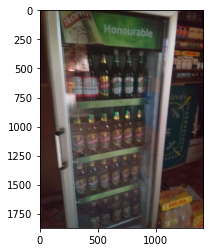

In [ ]:
%matplotlib inline

# Read in the image
image = cv2.imread('/content/8e39a50d-0767-4816-a35d-5683b4d1991c.jpg')

# Make a copy of the image
image_copy = np.copy(image)

# Change color to RGB (from BGR)
image = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

plt.imshow(image)

### Plot color channels

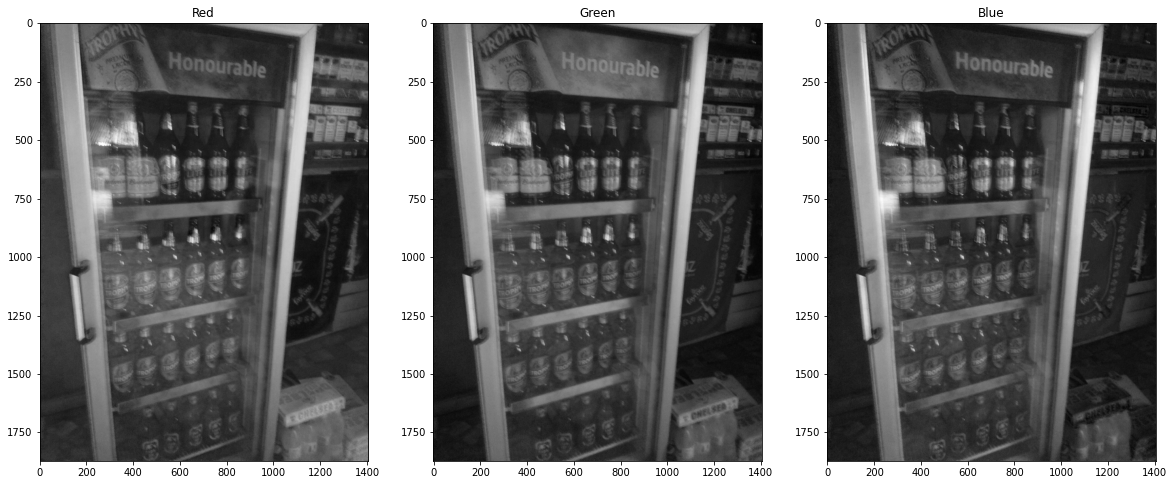

In [ ]:
# RGB channels
r = image[:,:,0]
g = image[:,:,1]
b = image[:,:,2]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

ax1.set_title('Red')
ax1.imshow(r, cmap='gray')

ax2.set_title('Green')
ax2.imshow(g, cmap='gray')

ax3.set_title('Blue')
ax3.imshow(b, cmap='gray')


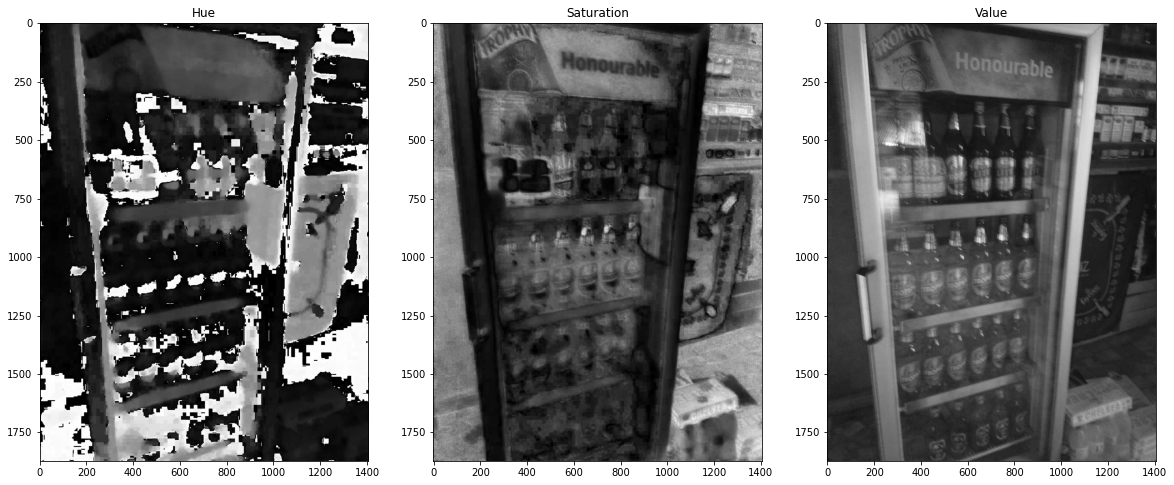

In [ ]:
# Convert from RGB to HSV
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

# HSV channels
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

ax1.set_title('Hue')
ax1.imshow(h, cmap='gray')

ax2.set_title('Saturation')
ax2.imshow(s, cmap='gray')

ax3.set_title('Value')
ax3.imshow(v, cmap='gray')


### Define pink and hue selection thresholds

In [ ]:
# Define our color selection criteria in HSV values
lower_hue = np.array([100,0,0]) 
upper_hue = np.array([150,200,200])


In [ ]:
# Define our color selection criteria in RGB values
lower_pink = np.array([180,0,100]) 
upper_pink = np.array([255,255,230])

### Mask the image 

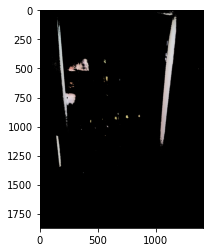

In [ ]:
# Define the masked area in RGB space
mask_rgb = cv2.inRange(image, lower_pink, upper_pink)

# mask the image
masked_image = np.copy(image)
masked_image[mask_rgb==0] = [0,0,0]

# Vizualize the mask
plt.imshow(masked_image)

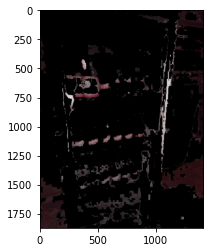

In [ ]:
# Now try HSV!

# Define the masked area in HSV space
mask_hsv = cv2.inRange(hsv, lower_hue, upper_hue)

# mask the image
masked_image = np.copy(image)
masked_image[mask_hsv==0] = [0,0,0]

# Vizualize the mask
plt.imshow(masked_image)

In [ ]:
import numpy as np
import cv2 as cv
img = cv.imread('tsukuba_l.png',0)
# create a CLAHE object (Arguments are optional).
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)
cv.imwrite('clahe_2.jpg',cl1)